## Imports & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jarradjinx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sem_train = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.csv')
sem_train = sem_train.rename(columns={'tweet': 'text'})

sem_train.head(100)

,text,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip : change the device name on...,0
4,I would date any of these men 🥺,0
...,...,...
95,"just finished such a long, 12 hour shift with ...",0
96,I am so in love with this woman,0
97,Liverpool are a cracking side - no harm in a 1...,0
98,That wiseguy will be good once they straighten...,0


In [4]:
sem_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1400 non-null   object
 1   sarcastic  1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [5]:
nan_in_tweet  = sem_train[sem_train['text'].isna()]
nan_in_tweet.head()

,text,sarcastic


In [6]:
sem_train = sem_train.dropna(subset=['text'])

sem_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1400 non-null   object
 1   sarcastic  1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


[Text(0, 0, '1200'), Text(0, 0, '200')]

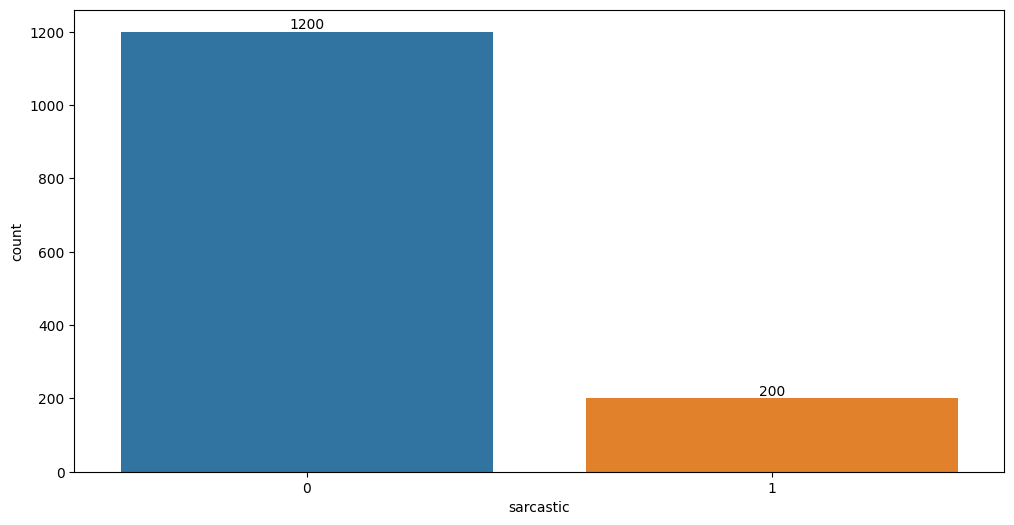

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='sarcastic', data=sem_train)
ax.bar_label(ax.containers[0])

In [9]:
sem_train['num_word_text'] = sem_train['text'].apply(lambda x:len(str(x).split()))
sem_train.head()

,text,sarcastic,num_word_text
0,"Size on the the Toulouse team, That pack is mo...",0,25
1,Pinball!,0,1
2,So the Scottish Government want people to get ...,1,19
3,villainous pro tip : change the device name on...,0,17
4,I would date any of these men 🥺,0,8


In [10]:
sem_train.describe()

,sarcastic,num_word_text
count,1400.000000,1400.000000
mean,0.142857,16.400000
std,0.350052,9.804012
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,15.000000
75%,0.000000,20.250000
max,1.000000,128.000000


<AxesSubplot: xlabel='num_word_text', ylabel='Count'>

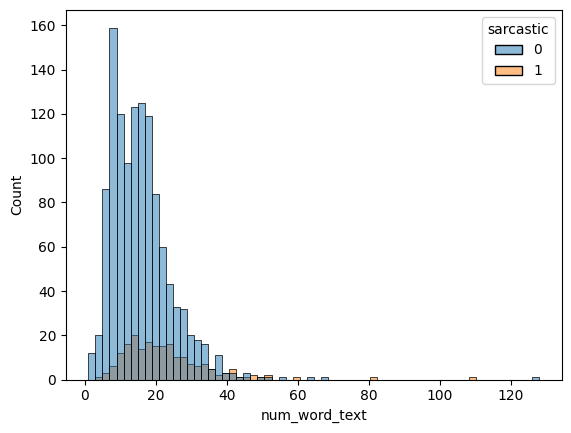

In [11]:
sns.histplot(x="num_word_text", data=sem_train,  hue="sarcastic")

In [12]:
pd.options.display.max_colwidth = 100
sem_train['text']

0       Size on the the Toulouse team, That pack is monstrous. \n\nI can't see a Welsh region ever winni...
1                                                                                                  Pinball!
2       So the Scottish Government want people to get their booster shots so badly that the website does...
3              villainous pro tip : change the device name on her bluetooth devices so she doesn’t forget u
4                                                                           I would date any of these men 🥺
                                                       ...                                                 
1395                                I’ve just seen this and felt it deserved a Retweet for its honesty xx 😘
1396                                                                   Omg how an earth is that a pen !!! 🤡
1397                                                              Bringing Kanye and drake to a tl near you
1398                   I lov

In [13]:
pd.options.display.max_colwidth = 200
sem_train.loc[sem_train['num_word_text'] == 61]


,text,sarcastic,num_word_text


In [14]:
# cleaning for word-based EDA
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
sem_train['text'] = sem_train['text'].apply(lambda x:clean_text(x))
sem_train['temp_list'] = sem_train['text'].apply(lambda x:str(x).split())
sem_train['text_stopped'] = sem_train['temp_list'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
sem_train.head()

,text,sarcastic,num_word_text,temp_list,text_stopped
0,size on the the toulouse team that pack is monstrous i cant see a welsh region ever winning this money talks as they say,0,25,"[size, on, the, the, toulouse, team, that, pack, is, monstrous, i, cant, see, a, welsh, region, ever, winning, this, money, talks, as, they, say]","[size, toulouse, team, pack, monstrous, cant, see, welsh, region, ever, winning, money, talks, say]"
1,pinball,0,1,[pinball],[pinball]
2,so the scottish government want people to get their booster shots so badly that the website doesnt even work,1,19,"[so, the, scottish, government, want, people, to, get, their, booster, shots, so, badly, that, the, website, doesnt, even, work]","[scottish, government, want, people, get, booster, shots, badly, website, doesnt, even, work]"
3,villainous pro tip change the device name on her bluetooth devices so she doesn’t forget u,0,17,"[villainous, pro, tip, change, the, device, name, on, her, bluetooth, devices, so, she, doesn’t, forget, u]","[villainous, pro, tip, change, device, name, bluetooth, devices, doesn’t, forget, u]"
4,i would date any of these men 🥺,0,8,"[i, would, date, any, of, these, men, 🥺]","[would, date, men, 🥺]"


In [16]:
sarcastic_df = sem_train.loc[sem_train['sarcastic'] == 1]
not_sarcastic_df = sem_train.loc[sem_train['sarcastic'] == 0]

top_sarcastic = Counter([item for sublist in sarcastic_df['text_stopped'] for item in sublist])
top_sarcastic_temp = pd.DataFrame(top_sarcastic.most_common(20))
top_sarcastic_temp.columns = ['common_words','count']
top_sarcastic_temp

,common_words,count
0,love,39
1,really,25
2,people,22
3,christmas,19
4,get,18
5,like,17
6,think,16
7,day,16
8,great,15
9,covid,15


<AxesSubplot: xlabel='count', ylabel='common_words'>

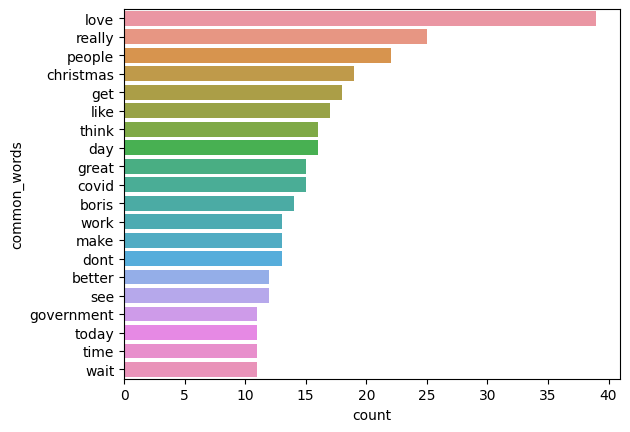

In [17]:
sns.barplot(x='count',y='common_words', data=top_sarcastic_temp)

In [18]:
top_not_sarcastic = Counter([item for sublist in not_sarcastic_df['text_stopped'] for item in sublist])
top_not_sarcastic_temp = pd.DataFrame(top_not_sarcastic.most_common(20))
top_not_sarcastic_temp.columns = ['common_words','count']
top_not_sarcastic_temp

,common_words,count
0,get,70
1,one,65
2,people,65
3,today,64
4,good,61
5,like,53
6,time,52
7,really,46
8,see,45
9,christmas,45


<AxesSubplot: xlabel='count', ylabel='common_words'>

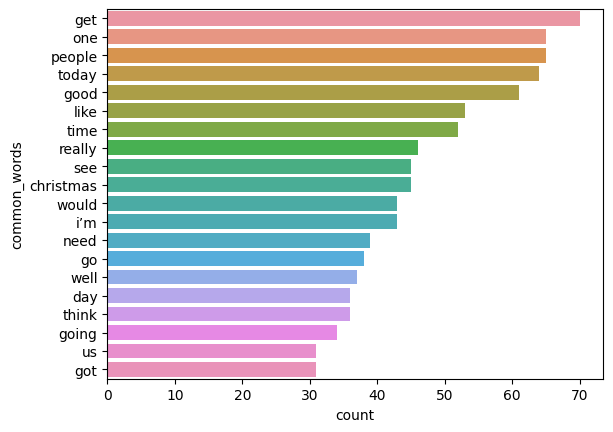

In [19]:
sns.barplot(x='count',y='common_words', data=top_not_sarcastic_temp)

## Adjust & Export Datasets for Train/test

## Prep Training Data

In [19]:
sem_train_prep = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/train/train.En.csv', index_col=0)
sem_train_prep.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
sem_train_prep = sem_train_prep.rename(columns={'tweet': 'text', 'sarcastic': 'label'})
sem_train_prep = sem_train_prep[['text', 'label']]
sem_train_prep

,text,label
0,The only thing I got from college is a caffeine addiction,1
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1
...,...,...
3463,The population spike in Chicago in 9 months is about to be ridiculous,0
3464,You'd think in the second to last English class of the year my prof would stop calling me Sean,0
3465,I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (hopefully on the mend now). Happy September all! Smell the pencil shavings and that new notebook aroma...,0
3466,"Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amaz...",0


In [21]:
sem_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [22]:
sem_train_prep = sem_train_prep.dropna(subset=['text'])
sem_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3467 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [23]:
sem_train_prep.to_csv('../data/target_semEval2022_en/iSarcasmEval-main/train/train.en.prepped.csv', index=False)

## Prep Test Data

In [24]:
sem_test_prep = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.csv')
sem_test_prep.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is monstrous. \n\nI can't see a Welsh region ever winning this, Money talks as they say .",0
1,Pinball!,0
2,So the Scottish Government want people to get their booster shots so badly that the website doesn't even work,1
3,villainous pro tip : change the device name on her bluetooth devices so she doesn’t forget u,0
4,I would date any of these men 🥺,0


In [25]:
sem_test_prep = sem_test_prep.rename(columns={'sarcastic': 'label'})
sem_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1400 non-null   object
 1   label   1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [26]:
sem_test_prep.to_csv('../data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.prepped.csv', index=False)